## Natural Language Processing for Stocks News Analysis:

Introduction

I. Conceptualization of the modeling task

II. Data Collection: Import Libraries/Datasets and Perform Exploratory Data Analysis

III. Data Preparation & Wrangling

IV. Data Exploration

V. Model Training

### Introduction:

Organizations are now dealing with structured, semi-structured, and unstructured data from within and outside the entreprise.

Unstructured data are generated from social media (eg. posts, tweets, blogs), email, and text communications, web traffic, online news sites, electronic images and other electronic information sources.

Unlike structured data that can be readily organized into data tables to be read and analyzed by computers, unstructured data require specific methods of preparation and refinement before being usable by computers and useful to investment professional.

Natural language processing (NLP) works by converting words (text) into numbers, these numbers are then used to train an AI/ML model to make predictions.

The main steps in building ML model include:
1. Conceptualization of the modeling task
2. Data collection
3. Data preparation and wrangling
4. Data exploration
5. Model training 

### I. Conceptualization of the modeling task

Conceptualization of the modeling task requires to define the problem, how the output of the model will be specified, how the model will be used and for whom, and whether the model will be embedded in existing business process.

In this project, we will build a machine learning model to analyze thousands of Twitter tweets to predict people’s sentiment towards a particular company or stock. AI/ML based sentiment analysis models can be used automatically understand the sentiment from public tweets, which could be used as a factor while making buy/sell decision of securities.

In this hands-on project, we will train a Long Short Term Memory (LSTM) deep learning model to perform stocks sentiment analysis. 

Now we will build a machine learning model to perform news sentiment analysis. In this hands-on project, we will complete the following tasks:
1. Apply python libraries to import and visualize datasets
2. Perform exploratory data analysis and plot word-cloud
3. Perform text data cleaning such as removing punctuation and stop words
4. Understand the concept of tokenizer
5. Perform tokenizing and padding on text corpus to feed the deep learning model
6. Understand the theory and intuition behind Recurrent Neural Networks and LSTM
7. Build and train the deep learning model
8. Assess the performance of the trained model

### II. Data Collection: Import Libraries/Datasets and Perform Exploratory Data Analysis:

First, we are going to install Wordcloud to perform powerful visualization of words and then we are going to install two key libraries:
- "gensim" which is an open-source library for unsupervised topic modeling and natural language processing and it is implemented in Python and Cython.
- "NLTK" which is Natural Language Tool Kit.

In [12]:
!pip install wordcloud
!pip install gensim
!pip install nltk

In [13]:
# import key libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import one_hot,Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

We are going to set the style of the notebook to be monokai theme. This line of code is important to ensure that we are able to see the x and y axes clearly.

In [14]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False) 

In [15]:
# load the stock news data
stock_df = pd.read_csv('C:\\Users\\Pattu\\OneDrive\\Documents\\02. Machine Learning\\01. Projects\\Natural Language Processing for Stocks News Analysis\\Stock_sentiment.csv')
stock_df.head()

,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


In [16]:
# dataframe information
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Text       5791 non-null   object
 1   Sentiment  5791 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 90.6+ KB


In [17]:
# check for null values
stock_df.isnull()

,Text,Sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5786,False,False
5787,False,False
5788,False,False
5789,False,False


In [18]:
# Find the number of unique values in a particular column
stock_df['Sentiment'].nunique()

2

Or we can use Seaborn to plot the count plot for our data to find the the number of unique values in a particular column.

C:\Users\Pattu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

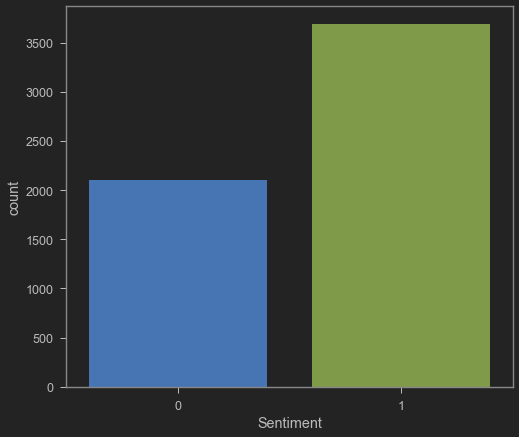

In [19]:
sns.countplot(stock_df['Sentiment'])

There are 2 classes in our dataframe 0 and 1. For the 0 sentiments, we have around 2000 tweets while for the 1 sentiments we have 3700 tweets.

in the next, we'll go ahead and perform data cleaning by removing punctuation from text.

### III. Data Preparation & Wrangling:

#### 1. Remove Punctuations from Text:

In [20]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

We are going to create a for loop that goes through every single character in each text for the entire 5791 tweets in order to get rid of every punctuation in the text.

In [21]:
# define a function to remove punctuations
def remove_punc(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)

    return Test_punc_removed_join

In [22]:
# remove punctuations from our dataset
stock_df['Text Without Punctuation'] = stock_df['Text'].apply(remove_punc)

In [23]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...
3,MNTA Over 12.00,1,MNTA Over 1200
4,OI Over 21.37,1,OI Over 2137


In [24]:
stock_df['Text'][2]

"user I'd be afraid to short AMZN - they are looking like a near-monopoly in eBooks and infrastructure-as-a-service"

In [25]:
stock_df['Text Without Punctuation'][2]

'user Id be afraid to short AMZN  they are looking like a nearmonopoly in eBooks and infrastructureasaservice'

#### 2. Remove Stopwords:

In [26]:
# download stopwords
nltk.download("stopwords")
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Pattu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [27]:
# Obtain additional stopwords from nltk
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['https','from', 'subject', 're', 'edu', 'use','will','aap','co','day','user','stock','today','week','year'])

In [28]:
# Remove stopwords and remove short words (less than 2 characters)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if len(token) >= 3 and token not in stop_words:
            result.append(token)
            
    return result

In [29]:
# apply pre-processing to the text column
stock_df['Text Without Punc & Stopwords'] = stock_df['Text Without Punctuation'].apply(preprocess)

In [30]:
stock_df['Text'][0]

'Kickers on my watchlist XIDE TIT SOQ PNK CPW BPZ AJ  trade method 1 or method 2, see prev posts'

In [31]:
stock_df['Text Without Punc & Stopwords'][0]

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts']

In [32]:
# join the words into a string
# stock_df['Processed Text 2'] = stock_df['Processed Text 2'].apply(lambda x: " ".join(x))

In [33]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,..."
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw..."
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop..."
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta]
4,OI Over 21.37,1,OI Over 2137,[]


### IV. Data Exploration:

#### 1. Plot Wordcloud:

A word cloud is a visual representation of all the words in a BOW (Bag of Words) such that words with higher frequency have a larger font size. The most commonly occuring words in the dataset can be shown by varying font size, and color is used to add more dimensions, such as frequency and length of words. This allows the analyst to determine which words are contextually more important.

In [34]:
# join the words into a string
stock_df['Text Without Punc & Stopwords Joined'] = stock_df['Text Without Punc & Stopwords'].apply(lambda x: " ".join(x))

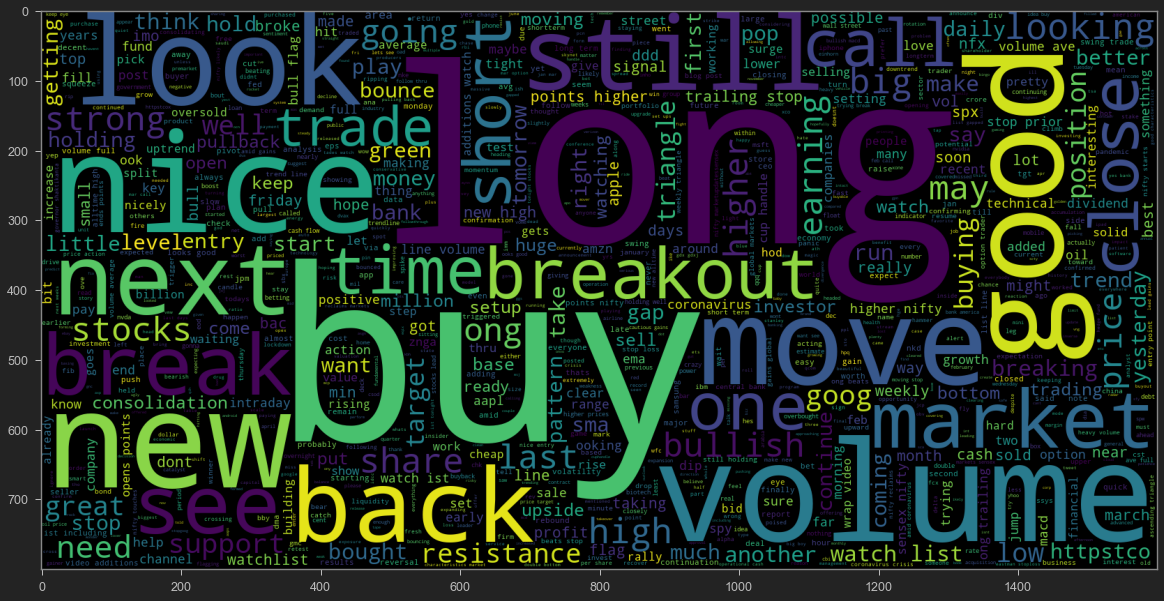

In [35]:
# plot the word cloud for text with positive sentiment
plt.figure(figsize = (20, 20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800).generate("".join(stock_df[stock_df['Sentiment']==1]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc)

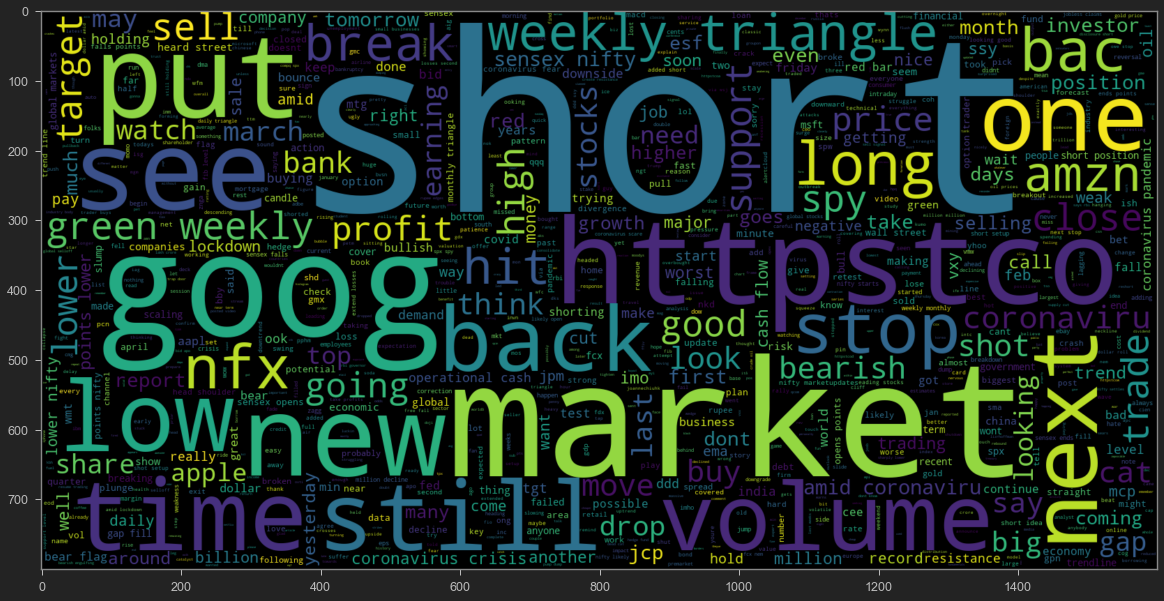

In [36]:

# Visualize the wordcloud for tweets that have negative sentiment
plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 1000, width = 1600, height = 800 ).generate(" ".join(stock_df[stock_df['Sentiment'] == 0]['Text Without Punc & Stopwords Joined']))
plt.imshow(wc, interpolation = 'bilinear');

#### 2. Visualize Cleaned Datasets:

In [37]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Pattu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
# word_tokenize is used to break up a string into words
print(stock_df['Text Without Punc & Stopwords Joined'][0])
print(nltk.word_tokenize(stock_df['Text Without Punc & Stopwords Joined'][0]))

kickers watchlist xide tit soq pnk cpw bpz trade method method see prev posts
['kickers', 'watchlist', 'xide', 'tit', 'soq', 'pnk', 'cpw', 'bpz', 'trade', 'method', 'method', 'see', 'prev', 'posts']


In [40]:
tweets_length = [ len(nltk.word_tokenize(x)) for x in stock_df['Text Without Punc & Stopwords Joined'] ]
tweets_length

[14,
 6,
 7,
 1,
 0,
 1,
 8,
 13,
 8,
 4,
 10,
 18,
 8,
 8,
 11,
 5,
 12,
 10,
 12,
 4,
 6,
 5,
 2,
 5,
 3,
 10,
 3,
 3,
 9,
 6,
 8,
 10,
 8,
 3,
 10,
 11,
 4,
 8,
 11,
 10,
 10,
 7,
 9,
 8,
 4,
 10,
 8,
 7,
 7,
 9,
 10,
 10,
 8,
 2,
 14,
 12,
 9,
 8,
 1,
 14,
 7,
 11,
 5,
 13,
 6,
 6,
 7,
 6,
 6,
 10,
 9,
 4,
 10,
 13,
 16,
 6,
 9,
 6,
 2,
 11,
 5,
 4,
 9,
 11,
 16,
 4,
 9,
 5,
 6,
 2,
 1,
 5,
 9,
 4,
 7,
 6,
 7,
 10,
 1,
 3,
 9,
 4,
 16,
 8,
 10,
 11,
 18,
 6,
 7,
 13,
 12,
 9,
 3,
 3,
 10,
 10,
 8,
 6,
 8,
 5,
 5,
 8,
 9,
 15,
 3,
 5,
 9,
 18,
 13,
 11,
 3,
 1,
 1,
 2,
 7,
 12,
 12,
 8,
 8,
 10,
 9,
 10,
 15,
 8,
 9,
 9,
 12,
 10,
 6,
 10,
 13,
 4,
 11,
 8,
 15,
 13,
 8,
 12,
 5,
 5,
 3,
 7,
 2,
 4,
 10,
 5,
 6,
 10,
 6,
 16,
 9,
 6,
 5,
 10,
 9,
 10,
 8,
 2,
 10,
 9,
 10,
 12,
 7,
 10,
 7,
 3,
 6,
 5,
 9,
 9,
 4,
 6,
 5,
 4,
 4,
 8,
 10,
 8,
 8,
 13,
 9,
 7,
 10,
 12,
 8,
 6,
 5,
 3,
 10,
 11,
 6,
 9,
 10,
 13,
 10,
 7,
 12,
 7,
 11,
 10,
 4,
 4,
 3,
 10,
 2,
 9,
 10,
 15,
 12,
 10

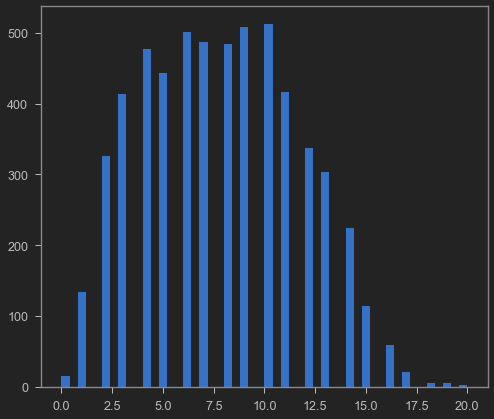

In [41]:
plt.hist(tweets_length, bins=50)
plt.show()

The distribution of the number of words that we have in the text is a bell curve which shows that most of tweets range between 5 and 11 number of words and then decay afterwards. 

We are going to use Seaborn Countplot to visually indicate how many samples belong to the positive and negative sentiments class.

C:\Users\Pattu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sentiment', ylabel='count'>

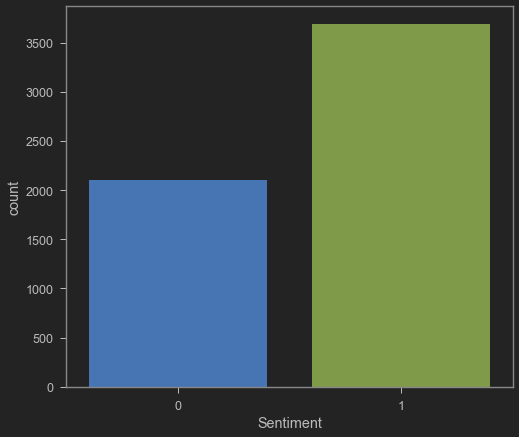

In [42]:
# plot the word count
sns.countplot(stock_df['Sentiment'])

#### 3. Tokenization:

Tokenization is the process of splitting a given text into separate tokens. This step takes place after cleansing the raw text data. The tokens are then normalized to create the bag of words (BOW) which is a collection of distinct set of tokens from all the texts in a sample dataset.

In [43]:
stock_df.head()

,Text,Sentiment,Text Without Punctuation,Text Without Punc & Stopwords,Text Without Punc & Stopwords Joined
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",kickers watchlist xide tit soq pnk cpw bpz tra...
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1,user AAP MOVIE 55 return for the FEAGEED indic...,"[movie, return, feageed, indicator, trades, aw...",movie return feageed indicator trades awesome
2,user I'd be afraid to short AMZN - they are lo...,1,user Id be afraid to short AMZN they are look...,"[afraid, short, amzn, looking, like, nearmonop...",afraid short amzn looking like nearmonopoly eb...
3,MNTA Over 12.00,1,MNTA Over 1200,[mnta],mnta
4,OI Over 21.37,1,OI Over 2137,[],


In [44]:
# Obtain the total words present in the dataset
list_of_words = []

for i in stock_df['Text Without Punc & Stopwords']:
    for j in i:
        list_of_words.append(j)

In [45]:
list_of_words

['kickers',
 'watchlist',
 'xide',
 'tit',
 'soq',
 'pnk',
 'cpw',
 'bpz',
 'trade',
 'method',
 'method',
 'see',
 'prev',
 'posts',
 'movie',
 'return',
 'feageed',
 'indicator',
 'trades',
 'awesome',
 'afraid',
 'short',
 'amzn',
 'looking',
 'like',
 'nearmonopoly',
 'ebooks',
 'mnta',
 'pgnx',
 'current',
 'downtrend',
 'break',
 'otherwise',
 'shortterm',
 'correction',
 'medterm',
 'downtrend',
 'mondays',
 'relative',
 'weakness',
 'nyx',
 'win',
 'tie',
 'tap',
 'ice',
 'int',
 'bmc',
 'aon',
 'chk',
 'biib',
 'goog',
 'ower',
 'trend',
 'line',
 'channel',
 'test',
 'volume',
 'support',
 'watch',
 'tomorrow',
 'ong',
 'entry',
 'assuming',
 'fcx',
 'opens',
 'tomorrow',
 'trigger',
 'buy',
 'still',
 'much',
 'like',
 'setup',
 'really',
 'worries',
 'everyone',
 'expects',
 'market',
 'rally',
 'nowusually',
 'exact',
 'opposite',
 'happens',
 'every',
 'time',
 'shall',
 'see',
 'soon',
 'bac',
 'spx',
 'jpm',
 'gamcos',
 'arry',
 'haverty',
 'apple',
 'extremely',
 'chea

In [46]:
# Obtain the total number of unique words
total_words = len(list(set(list_of_words)))
total_words

9268

### V. Model Training:

Model training involves selecting the appropriate ML algorithm, evaluating performance of the trained model, and tuning the model accordingly. These steps are iterative because model building is an iterative process.

#### 1. Prepare the Data by Tokenizing & Padding:

In [47]:
# split the data into test and train 
X = stock_df['Text Without Punc & Stopwords']
y = stock_df['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [48]:
X_train.shape

(4632,)

In [49]:
X_test.shape

(1159,)

In [50]:
X_train

469                                                    []
1335                    [follow, thru, nkd, profit, well]
4384                          [jpm, drop, bac, peak, bac]
1350    [market, rollling, folks, study, days, green, ...
5107    [loss, help, push, softbank, worst, results, c...
                              ...                        
3382    [equity, alpha, ike, ibm, break, trendline, re...
2736    [htz, reasonably, tight, consolidation, far, l...
895                                   [daily, thx, heads]
5559    [sensex, opens, points, higher, nifty, markets...
391     [far, good, regarding, apo, earnings, strategy...
Name: Text Without Punc & Stopwords, Length: 4632, dtype: object

In [51]:
# Create a tokenizer to tokenize the words and create sequences of tokenized words
tokenizer = Tokenizer(num_words = total_words)
tokenizer.fit_on_texts(X_train)

# Training data
train_sequences = tokenizer.texts_to_sequences(X_train)

# Testing data
test_sequences = tokenizer.texts_to_sequences(X_test)

In [52]:
train_sequences

[[],
 [278, 291, 160, 99, 59],
 [152, 170, 10, 2280, 10],
 [20, 3333, 868, 686, 87, 42, 627, 28, 687, 20, 43, 1009],
 [190, 538, 357, 1400, 279, 500, 2281, 628],
 [9, 170],
 [358, 124, 1010, 13, 629, 248],
 [1729, 3334, 209, 688, 2282, 161, 77, 331],
 [1168, 34, 17],
 [15, 3335, 3336, 452, 191, 775, 162, 220, 60, 332],
 [453, 131, 113, 237, 153, 18, 7, 39, 131, 100],
 [1011, 181, 1012, 1730, 3337, 1169, 1170, 16, 210, 77, 61, 1013],
 [869, 501, 359, 144, 59, 18, 776, 17, 3338, 777, 211, 3339],
 [200, 114, 3340, 3341, 75, 778, 1731, 870, 689, 400, 171, 45, 3342],
 [280, 1, 871],
 [61, 1732, 1733],
 [6, 2283, 872, 1734],
 [1735, 873, 1736, 585, 427, 690, 502, 45, 3343],
 [29, 874, 1737, 3344, 3345],
 [1014, 43, 2284, 49],
 [428, 172, 102, 3346, 3347, 19, 2285, 1738, 76, 779],
 [238,
  2286,
  115,
  691,
  28,
  3348,
  11,
  687,
  1171,
  586,
  3349,
  1739,
  1172,
  875,
  692,
  211,
  3350],
 [44, 309, 181, 18, 25, 3351, 876],
 [586, 11, 53, 5, 173, 2, 132, 12, 2287, 780],
 [587, 

In [53]:
test_sequences

[[11, 1406],
 [903, 2091, 211],
 [306, 211, 121, 75, 194, 565, 195, 297, 121, 161, 673],
 [10, 447, 90, 81, 9, 420, 1827],
 [12, 159],
 [384, 263, 22, 28],
 [44, 4360, 163, 3917, 8, 126, 163, 339, 6116, 347, 460, 97],
 [11, 62, 1, 430, 499, 120, 1, 415],
 [5462, 2092, 46, 1029, 2663, 1565, 213, 8050, 525, 769, 3125],
 [250, 11, 65, 154, 1018, 168, 8, 426],
 [1, 127, 115],
 [92, 774, 142],
 [479, 396, 25],
 [1038, 7427],
 [365, 581, 152, 2871],
 [99, 790, 2368, 6820],
 [9, 1583, 53, 19],
 [3, 305, 117, 4887, 679, 28, 92, 567, 206, 11, 202],
 [615, 3043, 1824, 2859],
 [9, 17, 1195, 3122],
 [1, 71, 304, 8119, 6305, 1723, 6170, 3407],
 [2854, 691, 28, 4607, 1920, 238, 68, 87, 1550, 453, 185, 661, 6],
 [1017, 12, 399, 102, 55, 2, 2885, 446, 80, 2735],
 [56, 1681, 128, 130, 28, 1015, 483, 35, 11, 233],
 [189, 416, 39],
 [4005, 4006, 162, 258, 173, 7593, 359, 5601],
 [89, 33],
 [914, 4, 148, 291, 167, 469, 854, 8, 426],
 [353, 975],
 [3057, 40, 447, 3, 2953, 2953, 183, 125, 1292, 199],
 [520,

In [54]:
print("The encoding for document\n", X_train[1:2],"\n is: ", train_sequences[1])

The encoding for document
 1335    [follow, thru, nkd, profit, well]
Name: Text Without Punc & Stopwords, dtype: object 
 is:  [278, 291, 160, 99, 59]


In [55]:
# Add padding to training and testing
padded_train = pad_sequences(train_sequences, maxlen = 15, padding = 'post', truncating = 'post')
padded_test = pad_sequences(test_sequences, maxlen = 15, truncating = 'post')

In [56]:
for i, doc in enumerate(padded_train[:3]):
     print("The padded encoding for document:", i+1," is:", doc)

The padded encoding for document: 1  is: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
The padded encoding for document: 2  is: [278 291 160  99  59   0   0   0   0   0   0   0   0   0   0]
The padded encoding for document: 3  is: [ 152  170   10 2280   10    0    0    0    0    0    0    0    0    0
    0]


In [57]:
# Convert the data to categorical 2D representation
y_train_cat = to_categorical(y_train, 2)
y_test_cat = to_categorical(y_test, 2)

In [58]:
y_train_cat.shape

(4632, 2)

In [59]:
y_test_cat.shape

(1159, 2)

In [60]:
y_train_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

#### 2. Understand the Theory behind Recurrent Neural Networks & Long Short Term Memory Networks (LSTM):

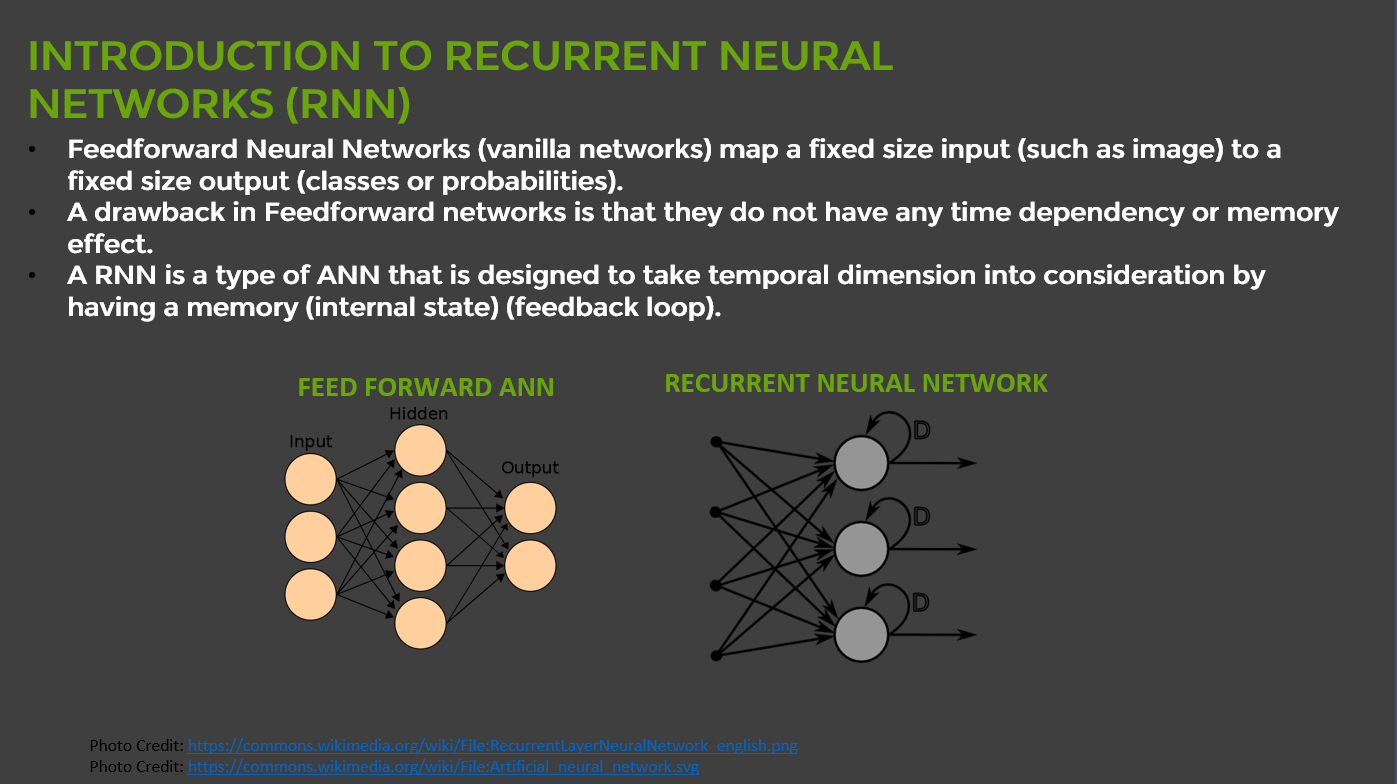

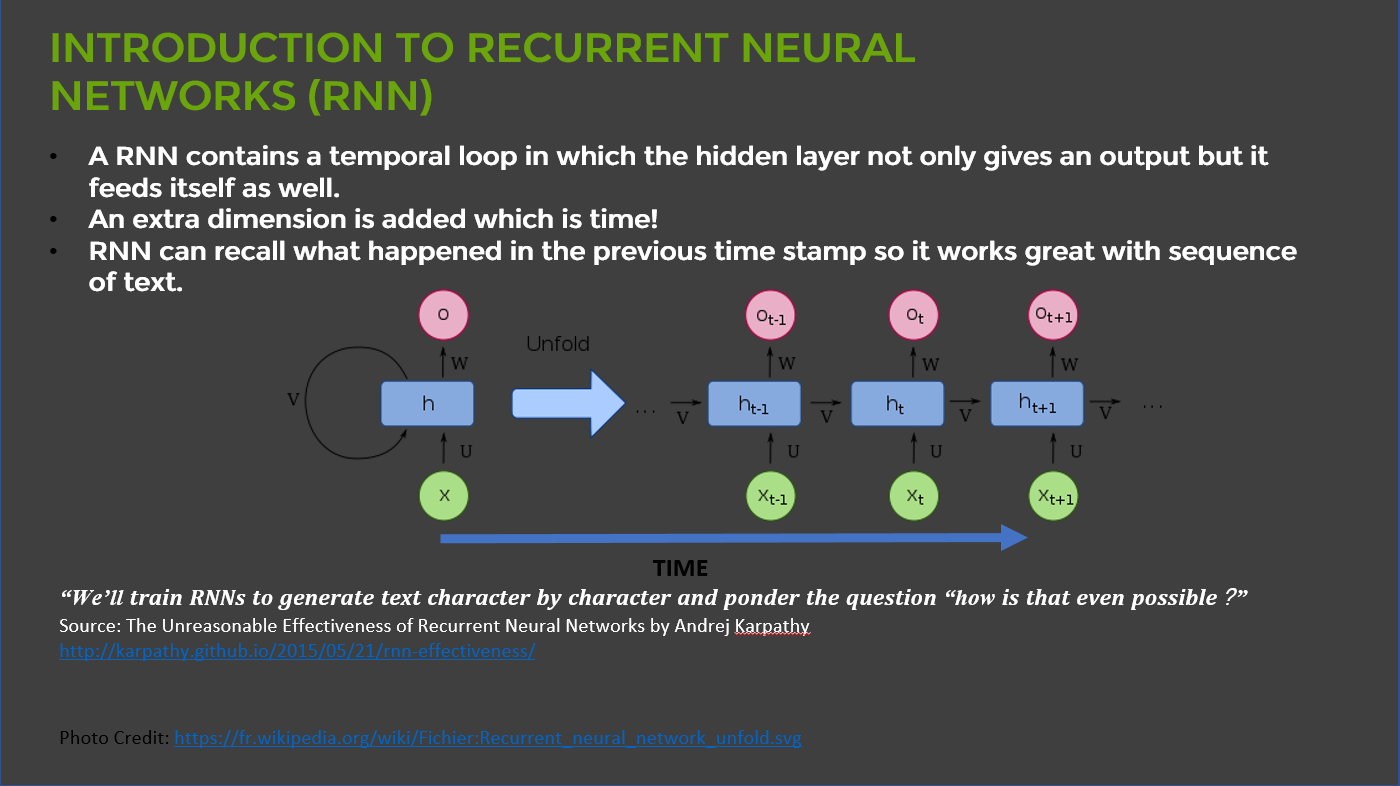

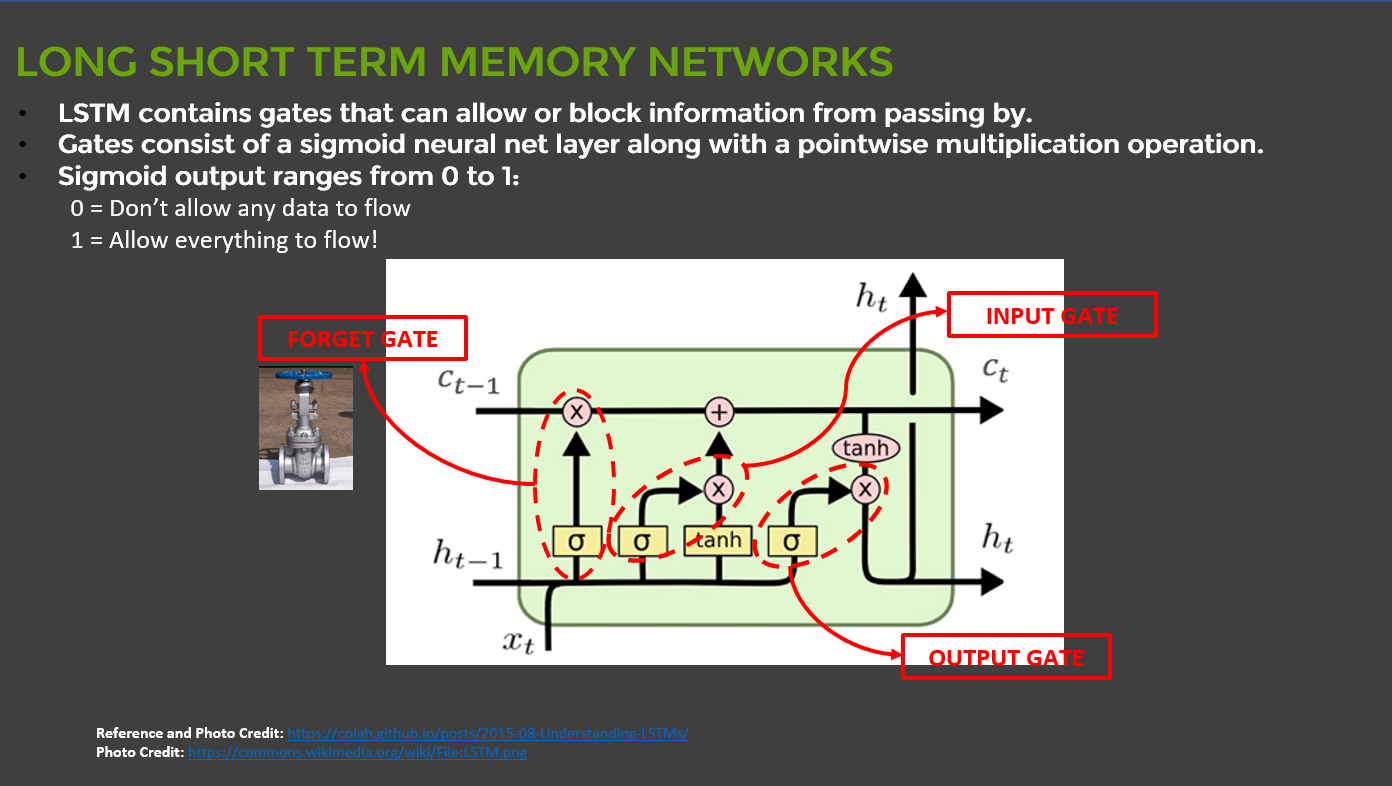

#### 3. Build a Custom-Based Deep Neural Network (LSTM Network) to perform Sentiment Analysis:

Embedding layers learn low-dimensional continuous representation of discrete input variables.

In [61]:
# Sequential Model
model = Sequential()

# embedding layer
model.add(Embedding(total_words, output_dim = 512))

# Bi-Directional RNN and LSTM
model.add(LSTM(256))

# Dense layers
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(2,activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 512)         4745216   
_________________________________________________________________
lstm (LSTM)                  (None, 256)               787456    
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 258       
Total params: 5,565,826
Trainable params: 5,565,826
Non-trainable params: 0
_________________________________________________________________


In [62]:
# train the model
model.fit(padded_train, y_train_cat, batch_size = 32, validation_split = 0.2, epochs = 2)

Epoch 1/2
116/116 [==============================] - 26s 228ms/step - loss: 0.5957 - acc: 0.6850 - val_loss: 0.5224 - val_acc: 0.7508
Epoch 2/2
116/116 [==============================] - 28s 240ms/step - loss: 0.2940 - acc: 0.8842 - val_loss: 0.5647 - val_acc: 0.7389


#### 4. Assess Trained Model Performance:

In order to validate a ML model, we must measure its training performance. We will next consider several techniques to measure model performance or goodness of fit of a ML algorithm that are well suited specifically for binary classification models.

Model performance can be evaluated by using error analysis. For a classification model, a confusion matrix for error analysis (TPs, TNs, FPs and FNs are determined) is created, and evaluation metrics such as Precision, Recall, Accuracy score and F1 score are claculated. The higher the accuracy and F1 score, the better the model performance.

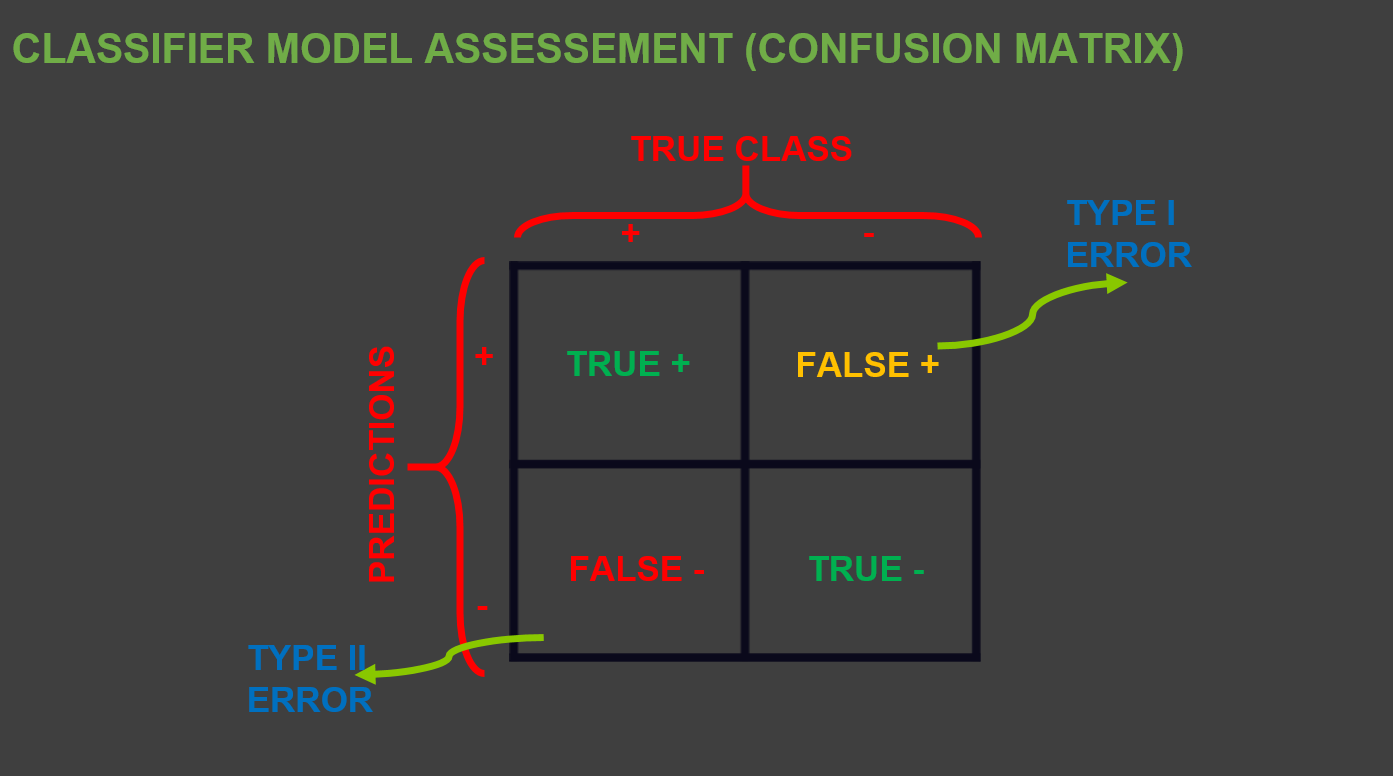

In [63]:
# make prediction
pred = model.predict(padded_test)

In [64]:
pred

array([[0.515648  , 0.48435205],
       [0.8040072 , 0.19599281],
       [0.8182286 , 0.1817714 ],
       ...,
       [0.06371243, 0.93628764],
       [0.98352987, 0.01647014],
       [0.11527535, 0.8847247 ]], dtype=float32)

In [65]:
# make prediction
prediction = []
for i in pred:
  prediction.append(np.argmax(i))

In [66]:
prediction

[0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,


In [67]:
y_test_cat

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [68]:
# list containing original values
original = []
for i in y_test_cat:
  original.append(np.argmax(i))

In [69]:
original

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,


In [70]:
# acuracy score on text data
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(original, prediction)
accuracy

0.7463330457290768

<AxesSubplot:>

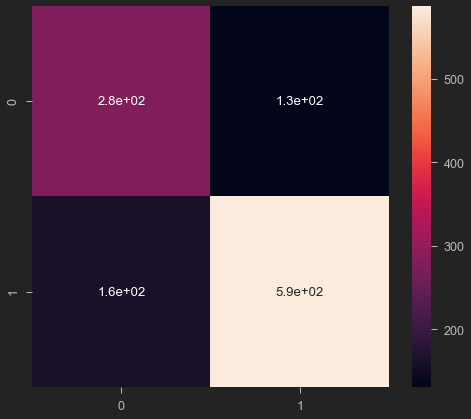

In [71]:
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original, prediction)
sns.heatmap(cm, annot = True)